# Bus Simulator Sandbox (under development)
## Yuwen Chang

In [1]:
# import packages
from __future__ import print_function, division

import os
import sys
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import calendar
from datetime import datetime

try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Yuwen/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# I. Data Generation Pipeline
## 1. Vehicle Data
## 1a. Real-time Data Query

In [ ]:
# !python fetchbus.py $MTAAPIKEY "M1" 240

## 1b. Historical Sample Data

In [ ]:
df = pd.read_csv("MTA_data/M1-Tue-180410-154415-260.csv")
df.head()

## 2. Route Data
- METHOD 1: Subset and sort built-in data using CallDistanceAlongRoute in df
- METHOD 2: Use up-to-date shapefile, read as gpd and query
- METHOD 3: Query latest GTFS data through online database

## 3. Visualization
## 3a. Plain Line
### Issue: dynamic update controller

In [26]:
# import osmnx as ox
# import networkx as nx
# import geopandas as gpd
# from collections import Counter

# from geopy import Nominatim
from geopy.distance import vincenty
# from shapely.geometry import Point

### Issue: precision
1. Use distance along the route (geopy, Google API, or Carto API)
2. Preferably, find SIRI data that contains variable "CallDistanceAlongRoute"
3. Check visualization directions

In [46]:
# calculate stop distances
dist = []
lats = list(B54_merge['stop_lat'])
lons = list(B54_merge['stop_lon'])
for i in arange(len(B54_stops)):
    if i < len(B54_stops) - 1:
        p1 = lats[i], lons[i]
        p2 = lats[i+1], lons[i+1]
        di = vincenty(p1, p2).meters
        dist.append(di)
dist

[164.10592592573394,
 524.6821220855292,
 183.2864635647531,
 166.04481363027242,
 168.16662072005468,
 249.32389728515443,
 280.8678932398275,
 65.1613773786362,
 162.277246106055,
 160.8227222138864,
 156.99423276306914,
 177.8182272706027,
 262.3958689692586,
 186.7201549309188,
 134.44950499065496,
 113.44836241741916,
 271.7303956584878,
 243.00538513176005,
 292.5054493596941,
 190.84614888127206,
 295.74318979161654,
 180.16350288585392,
 297.9947729558094,
 205.45446314960742,
 168.5189134674809,
 151.1404164049675,
 170.5531370778554,
 218.34221496184352,
 226.21779839123397,
 226.0960471262775,
 374.39793393469455,
 130.71672370770722]

In [51]:
# calculate stop distances along the route (cumulative distance)
di = 0
cum_dist = [0]
for d in dist[:-1]:
    di += d
    cum_dist.append(di)
cum_dist = np.array(cum_dist)
cum_dist

array([   0.        ,  164.10592593,  688.78804801,  872.07451158,
       1038.11932521, 1206.28594593, 1455.60984321, 1736.47773645,
       1801.63911383, 1963.91635994, 2124.73908215, 2281.73331491,
       2459.55154218, 2721.94741115, 2908.66756608, 3043.11707107,
       3156.56543349, 3428.29582915, 3671.30121428, 3963.80666364,
       4154.65281252, 4450.39600231, 4630.5595052 , 4928.55427816,
       5134.00874131, 5302.52765477, 5453.66807118, 5624.22120826,
       5842.56342322, 6068.78122161, 6294.87726874, 6669.27520267])

In [57]:
df['VehDistAlongRoute']

1     269.72
2     269.72
3     269.72
4     269.72
5     269.72
6     269.72
7     269.72
8     269.72
9     269.72
10    269.72
Name: VehDistAlongRoute, dtype: float64

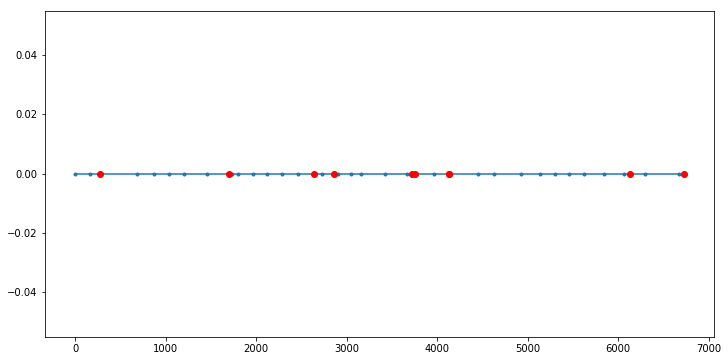

In [63]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.plot(cum_dist, [0]*len(cum_dist), '.-')
ax.plot(df['VehDistAlongRoute'], [0]*len(df), 'ro')
plt.show()

## 3b. Plain Topology

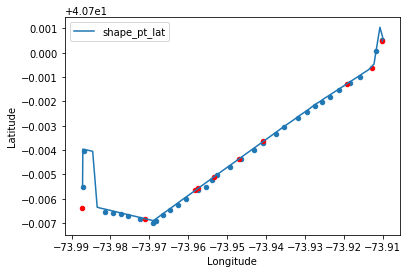

In [64]:
# plot route
ax = temp_shp.plot('shape_pt_lon', 'shape_pt_lat')

# plot stops
B54_stops.plot.scatter('stop_lon', 'stop_lat', ax=ax)

# plot active buses
df.plot.scatter('Longitude', 'Latitude', color='red', ax=ax)

## 3c. Map Topology

In [ ]:
import gmap

## 3d. Time-space Diagram
Also include a log file!

## 4. Simulation
## 4a. Objects Creation

## 4b. Attribute Assignment

## 4c. Environment Variables

## 4d. User Interface

## 4e. Dynamic Display
1. 0.5-sec update
2. time-space diagram
3. trace log

## 4f. Web Deployment
1. Control panel
2. Real-time info on Google basemap
3. Real-time info on straightened route topology
    - 3a. BB indicator
4. Dynamic time-space diagram

# End

- 3/11 4
- 3/12 1.5
- 3/16 1
- 3/17 2
- 3/18 2
- 3/20 1.5
- 3/23 2
- 4/3 3
- 4/5 0.5
- 4/6 1.5
- 4/9 1.5